# Movie Genre Trends and Ratings Analysis (2005–2025) 
This project explores how movie genres have evolved between 2005 and mid 2025 using IMDb data. 

**Tools:** Pandas, NumPy, Matplotlib, Seaborn

**Goals:**
- Identify which genres tend to have the highest-rated movies overall
- Determine how has genre popularity shifted over time
- Identify which genres get the most audience engagement
- Identify the trend of ratings over time 
- Determine the 3 highest-rated movies per most popular Genres

**Dataset information:**

The dataset used in this project was originally sourced from Kaggle (now unavailable). It contains information about movies, TV series, and mini-series, including their genres, ratings, and release years. Each row represents a unique title and includes the following columns:

- id: IMDb ID of the title (e.g., tt1234567)
- title: Name of the movie or series
- type: Type of media (e.g., movie, tvSeries, tvMiniSeries)
- genres: A comma-separated string of genres (e.g., Action,Drama)
- averageRating: IMDb user rating (float, from 0 to 10)
- numVotes: Total number of user votes
- releaseYear: Year the title was released

Note: The original dataset is no longer publicly available on Kaggle. However, a local version was retained for analysis and exploration.

## 1. Load and preview the dataset. Setup for visualization

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from matplotlib.ticker import FuncFormatter


try:
    df = pd.read_csv('data.csv')
except FileNotFoundError:
    print("Error: data.csv not found. Make sure the file is in the correct directory.")
    sys.exit(1)
    
print(df.head().to_string())
sns.set(style='whitegrid')
plt.rcParams["figure.figsize"] = (12, 6)

          id             title          type                      genres  averageRating  numVotes  releaseYear
0  tt3655326   Life Is a Dream         movie  Documentary, Drama, Family           10.0     31271         2014
1  tt0903747      Breaking Bad      tvSeries      Crime, Drama, Thriller            9.5   2347046         2008
2  tt0185906  Band of Brothers  tvMiniSeries      Action, Drama, History            9.4    565009         2001
3  tt0795176      Planet Earth  tvMiniSeries         Documentary, Family            9.4    228015         2006
4  tt5491994   Planet Earth II  tvMiniSeries                 Documentary            9.4    167195         2016


## 2. Filter data by 'movie' type and release year from 2005 onward

In [28]:
filtered_df = df[(df['type'] == 'movie') & (df['releaseYear']>=2005)].copy()
print(filtered_df.shape)

(2027, 7)


## 3. Clean the genres column

In [29]:
filtered_df['primaryGenre'] = filtered_df['genres'].apply(
    lambda x: x.split(',')[0] if pd.notnull(x) else None)
print(filtered_df.head(1).to_string())

          id            title   type                      genres  averageRating  numVotes  releaseYear primaryGenre
0  tt3655326  Life Is a Dream  movie  Documentary, Drama, Family           10.0     31271         2014  Documentary


## 4. Check if there are null values in the dataset

In [30]:
print(filtered_df.isnull().sum())

id               0
title            0
type             0
genres           0
averageRating    0
numVotes         0
releaseYear      0
primaryGenre     0
dtype: int64


## 5. Average Rating by Genre
Which genres tend to have the highest-rated movies overall?

In [31]:
avg_rating_by_genre = filtered_df.groupby(['primaryGenre'])['averageRating'].mean().round(2).sort_values(ascending=False)
print(avg_rating_by_genre.to_string())

primaryGenre
Documentary    7.75
Animation      7.73
Mystery        7.65
Romance        7.60
Action         7.59
Biography      7.56
Adventure      7.54
Drama          7.53
Crime          7.52
Comedy         7.47
Horror         7.31
Fantasy        7.30
Sci-Fi         7.30
Music          7.10


### Plot the average IMDb Rating by Genre

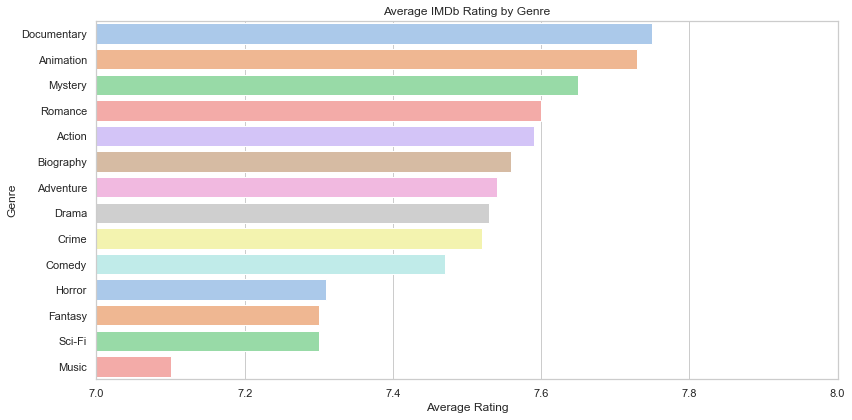

In [32]:
sns.barplot(x=avg_rating_by_genre.values, y=avg_rating_by_genre.index, palette='pastel')
plt.title('Average IMDb Rating by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.xlim(7.0, 8.0) 
plt.tight_layout()
plt.show()

## 6. Number of Movies per Genre per Year
How has genre popularity shifted over time? Are some genres declining or growing?

In [33]:
movie_count_by_genre_year = filtered_df.groupby(['primaryGenre','releaseYear']).size().unstack(fill_value=0)
print(movie_count_by_genre_year.head())

releaseYear   2005  2006  2007  2008  2009  2010  2011  2012  2013  2014  ...  \
primaryGenre                                                              ...   
Action          13    19    16    26    21    19    22    20    16    32  ...   
Adventure        5     7     7     3     9     7     7     9    11    10  ...   
Animation        1     1     2     1     2     1     2     1     4     2  ...   
Biography       12     6    11    12     8     8     4    12    16    15  ...   
Comedy          16    21    16    11    20    22    23    15    14    16  ...   

releaseYear   2016  2017  2018  2019  2020  2021  2022  2023  2024  2025  
primaryGenre                                                              
Action          27    27    26    28    14    29    22    28    16    10  
Adventure        6     7     8     6     2     8     5     5     5     1  
Animation        6     2     1     2     2     3     2     1     4     0  
Biography       18    13    23    21     4    13    13   

### Plot Only the Top 5 Genres (based on total movies)

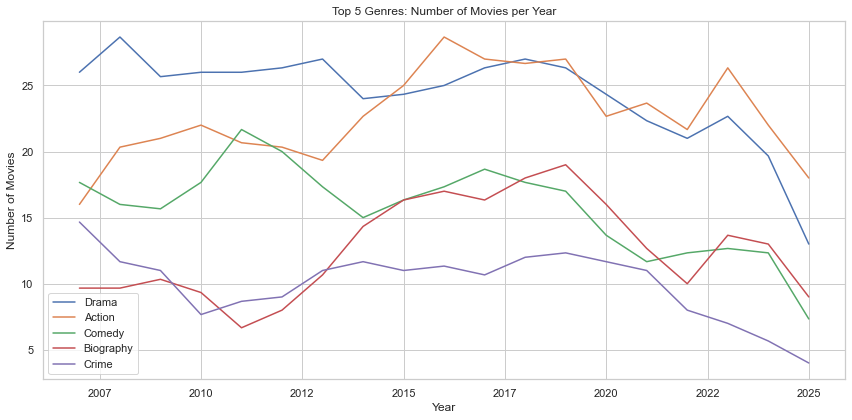

In [34]:
# Calculate total movie count per genre
top_genres = movie_count_by_genre_year.sum(axis=1).sort_values(ascending=False).head(5).index
# Filter to top genres only
top_genres_filtered = movie_count_by_genre_year.loc[top_genres]
# Smooth out noisy trends
top_5_data_smooth = top_genres_filtered.rolling(window=3, axis=1).mean()

for genre in top_5_data_smooth.index:
    plt.plot(top_5_data_smooth.columns, top_5_data_smooth.loc[genre], label=genre)

plt.title('Top 5 Genres: Number of Movies per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend()
# Format x-axis: show year without .0
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))
plt.tight_layout()
plt.show()

## 7. Top Genres by Average Votes
Which genres get the most audience engagement?

In [35]:
avg_votes_by_genre = filtered_df.groupby(['primaryGenre'])['numVotes'].mean().round(2).sort_values(ascending=False)
print(avg_votes_by_genre)

primaryGenre
Sci-Fi         454308.50
Horror         324187.69
Adventure      253608.42
Action         244865.07
Fantasy        188680.50
Drama          122159.42
Biography      120214.35
Crime          120155.71
Comedy         108102.49
Animation       79770.38
Mystery         65082.75
Romance         25541.00
Documentary     23754.81
Music           18525.00
Name: numVotes, dtype: float64


### Plot the average number of votes by genre

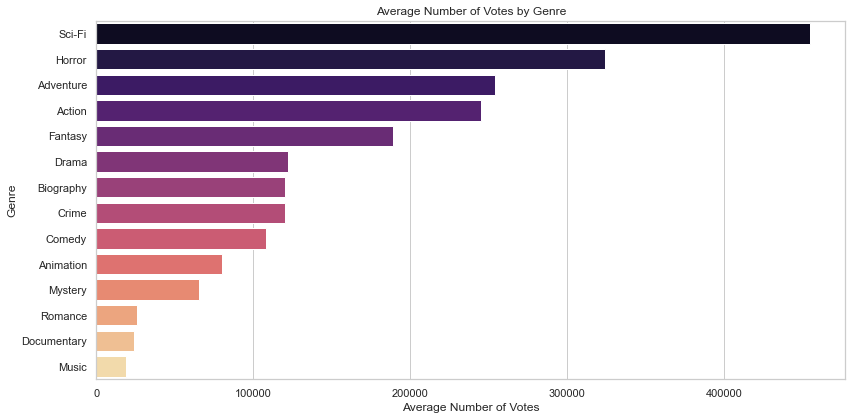

In [36]:
sns.barplot(x=avg_votes_by_genre.values, y=avg_votes_by_genre.index, palette='magma')
plt.title('Average Number of Votes by Genre')
plt.xlabel('Average Number of Votes')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

## 8. Trend of Ratings Over Time 
Are movie ratings going up or down over the years?

In [37]:
yearly_ratings = filtered_df.groupby(['releaseYear'])['averageRating'].mean().round(2)
print(yearly_ratings)

releaseYear
2005    7.52
2006    7.52
2007    7.50
2008    7.54
2009    7.51
2010    7.50
2011    7.50
2012    7.54
2013    7.54
2014    7.60
2015    7.53
2016    7.56
2017    7.47
2018    7.56
2019    7.60
2020    7.57
2021    7.56
2022    7.61
2023    7.57
2024    7.70
2025    7.70
Name: averageRating, dtype: float64


### Plot the average IMDb rating per year

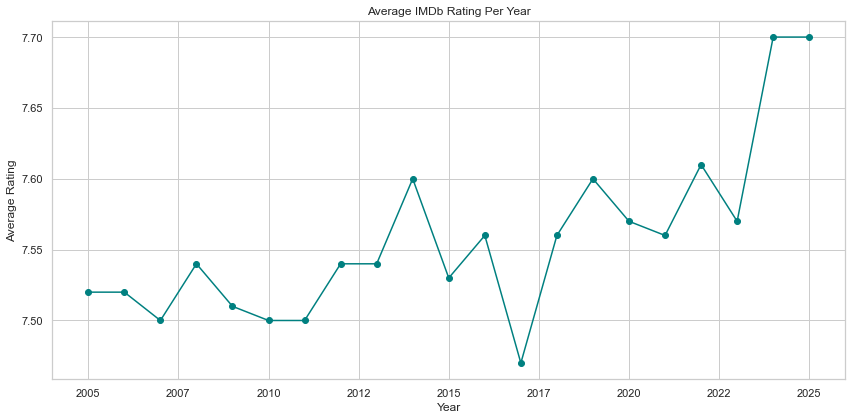

In [38]:
yearly_ratings.plot(marker='o', linestyle='-', color='teal')
plt.title('Average IMDb Rating Per Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
# Format x-axis: show year without .0
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))
plt.tight_layout()
plt.show()

## 9. Top 3 Highest-Rated Movies per Genre
What are the must-watch titles in each genre?

In [39]:
top_movies = (
    filtered_df
    .sort_values(['primaryGenre', 'averageRating'], ascending=[True, False])
    .groupby('primaryGenre')
    .head(3)
)
print(top_movies[['title','primaryGenre','averageRating','releaseYear']].head(15))

                                          title primaryGenre  averageRating  \
28   Attack on Titan the Movie: The Last Attack       Action            9.2   
44                              The Dark Knight       Action            9.0   
109                                   Inception       Action            8.8   
149                                Interstellar    Adventure            8.7   
192                                 777 Charlie    Adventure            8.7   
331                                       Daman    Adventure            8.6   
522                                  Your Name.    Animation            8.4   
845                Violet Evergarden: The Movie    Animation            8.3   
918                              The Wild Robot    Animation            8.2   
100                       O.J.: Made in America    Biography            8.9   
173                                   12th Fail    Biography            8.7   
272                  Rocketry: The Nambi Effect    B

### Plot the top 3 Highest-Rated Movies per Top 5 Genres

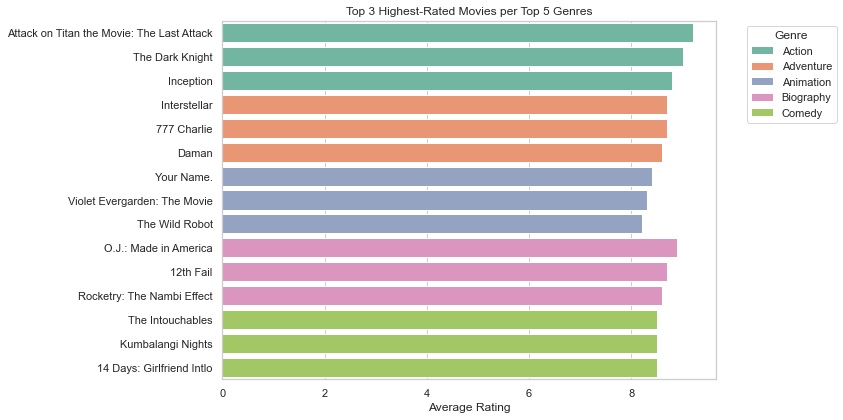

In [40]:
# Select top 5 genres
top_genres_for_plot = top_movies['primaryGenre'].value_counts().head(5).index

# Filter the already computed top_movies for these top 5 genres
plot_data = top_movies[top_movies['primaryGenre'].isin(top_genres_for_plot)]

# Sort by primaryGengre ascending and averageRating descending for better layout
plot_data = plot_data.sort_values(by=['primaryGenre', 'averageRating'], ascending=[True, False])

sns.barplot(
    data=plot_data,
    x='averageRating',
    y='title',
    hue='primaryGenre',
    dodge=False,
    palette='Set2'
)

plt.title('Top 3 Highest-Rated Movies per Top 5 Genres')
plt.xlabel('Average Rating')
plt.ylabel('')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 10. Export data for Tableau dashboard

In [ ]:
# filtered_df.to_csv('cleaned_movies.csv', index=False)
# avg_rating_by_genre.to_csv('avg_rating_by_genre.csv')
# movie_count_by_genre_year.to_csv('genre_popularity_by_year.csv')
# avg_votes_by_genre.to_csv('avg_votes_by_genre.csv')
# yearly_ratings.to_csv('yearly_ratings.csv')
# top_movies.to_csv('top_movies.csv')

## Summary

- Documentaries have the highest average rating, but receive fewer votes.
- Action and Drama dominate in terms of volume.
- Sci-Fi, Horror, and Adventure receive the most audience engagement.

The data has been exported to visualize these findings using Tableau in the future.